In [1]:
import numpy
import py_qip
from matplotlib import pyplot

# Rotor

One qubit in the center labeled $0$, project onto each pair $\langle 0, i \rangle$ with projector $t$

In [2]:
t = numpy.array([
    [1.,0.,0.,0.],
    [0.,.5,.5,0.],
    [0.,.5,.5,0.],
    [0.,0.,0.,1.],
], dtype=numpy.complex128)

N = 4
b = py_qip.Circuit(qubits=N)
for i in range(1, N):
    # Act on qubits 0 and i with matrix t
    b.apply_gate([0, i], t)
mat = b.get_circuit()

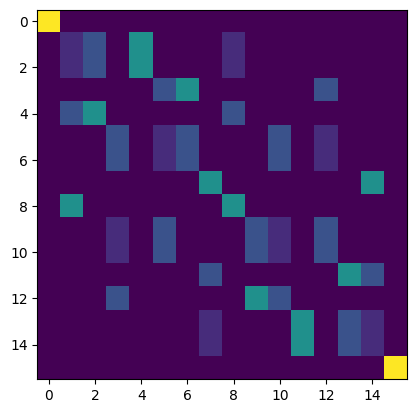

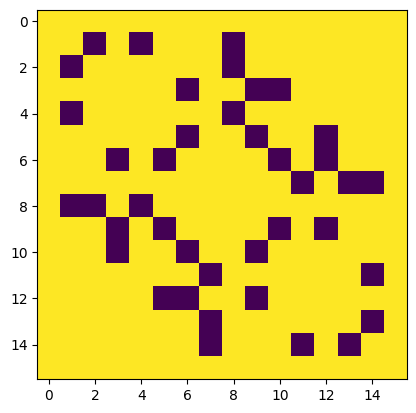

In [3]:
pyplot.imshow(mat.real)
pyplot.show()

pyplot.imshow(mat == mat.T)
pyplot.show()

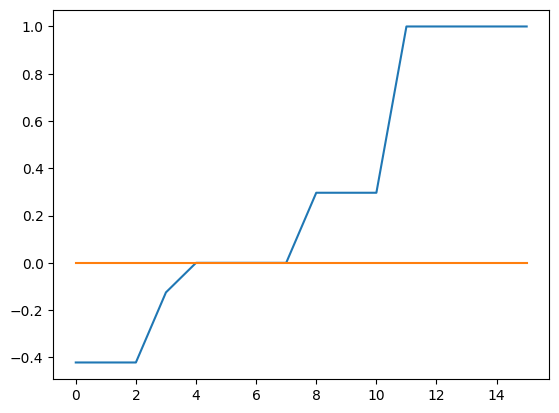

In [4]:
arr = numpy.array(sorted(numpy.linalg.eigvals(mat), key=lambda x: x.real))

pyplot.plot(arr.real)
pyplot.plot(arr.imag)
pyplot.show()

# Triangle of projectors

Project each pair $\langle i j \rangle$ on a closed loop.

In [5]:
t = numpy.array([
    [1.,0.,0.,0.],
    [0.,.5,.5,0.],
    [0.,.5,.5,0.],
    [0.,0.,0.,1.],
], dtype=numpy.complex128)

N = 3
b = py_qip.Circuit(qubits=N)
for i in range(0, N):
    b.apply_gate([i, (i+1)%N], t)
mat = b.get_circuit()

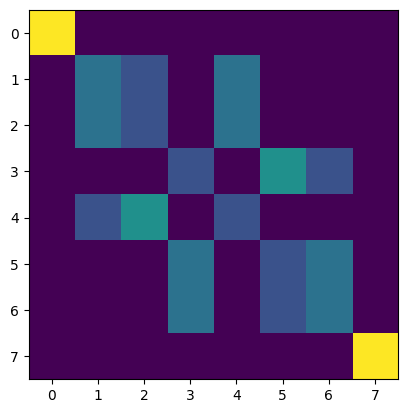

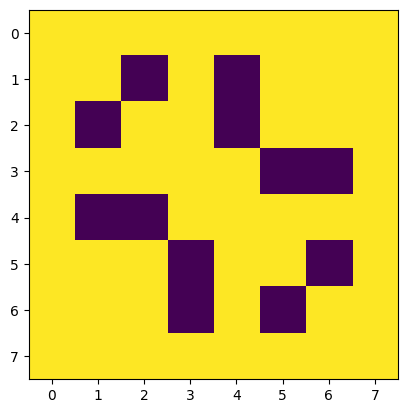

In [6]:
pyplot.imshow(mat.real)
pyplot.show()

pyplot.imshow(mat == mat.T)
pyplot.show()

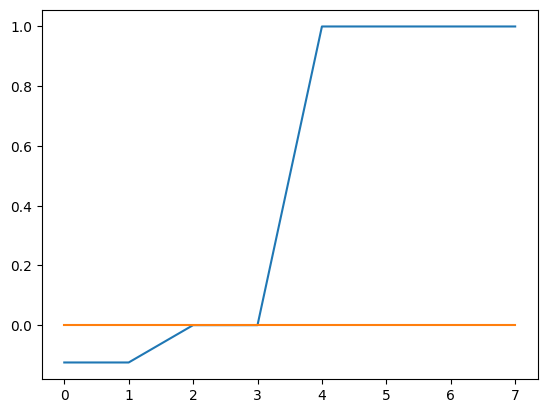

In [7]:
arr = numpy.array(sorted(numpy.linalg.eigvals(mat), key=lambda x: x.real))

pyplot.plot(arr.real)
pyplot.plot(arr.imag)
pyplot.show()

# Conjugate by O

In [8]:
from scipy.stats import ortho_group

In [9]:
o = ortho_group.rvs(4)
o

array([[ 8.75030126e-01, -1.58530046e-01,  2.81995116e-01,
         3.60096178e-01],
       [ 6.03681693e-02,  8.03390015e-01, -3.47917624e-01,
         4.79451243e-01],
       [-4.08703225e-01, -4.44713783e-01,  4.77058557e-04,
         7.96988769e-01],
       [ 2.52268977e-01, -3.62853081e-01, -8.94109531e-01,
        -7.25682493e-02]])

In [10]:
t = numpy.array([
    [1.,0.,0.,0.],
    [0.,.5,.5,0.],
    [0.,.5,.5,0.],
    [0.,0.,0.,1.],
], dtype=numpy.complex128)
t = numpy.conjugate(o.T) @ t @ o

print(numpy.linalg.eigvals(t))

N = 4
b = py_qip.Circuit(qubits=N)
for i in range(1, N):
    b.apply_gate([0, i], t)
mat = b.get_circuit()

[ 1.00000000e+00+0.j -4.45964884e-17+0.j  1.00000000e+00+0.j
  1.00000000e+00+0.j]


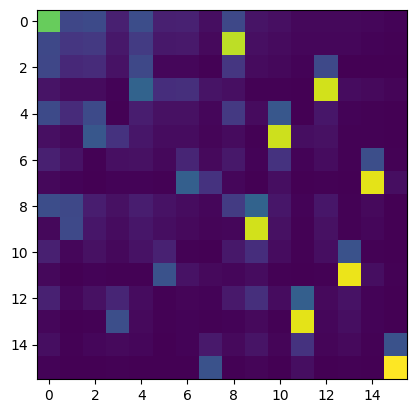

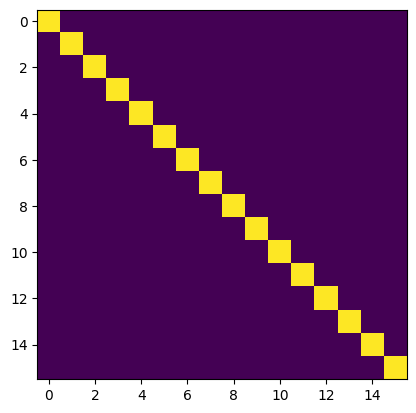

In [11]:
pyplot.imshow(numpy.abs(mat))
pyplot.show()

pyplot.imshow(mat == mat.T)
pyplot.show()

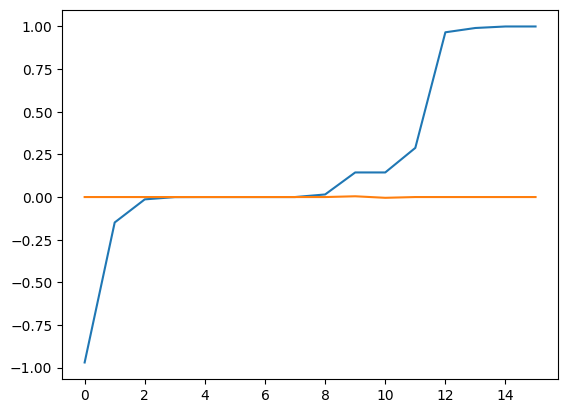

In [12]:
arr = numpy.array(sorted(numpy.linalg.eigvals(mat), key=lambda x: x.real))

pyplot.plot(arr.real)
pyplot.plot(arr.imag)
pyplot.show()

# Conjugate by $U$

In [45]:
from scipy.stats import unitary_group

In [46]:
u = unitary_group.rvs(4)
u

array([[-0.21697621-0.35210427j,  0.30918177+0.650649j  ,
         0.13618797-0.4799267j ,  0.20368144+0.14015521j],
       [ 0.0710955 +0.84069838j, -0.20985756+0.28890236j,
        -0.10159456-0.3210757j ,  0.10522592+0.19021918j],
       [-0.10305114+0.25754864j,  0.30710798+0.46285973j,
         0.2021595 +0.41364483j, -0.51218575-0.3744195j ],
       [ 0.18149561-0.08499452j, -0.16751254-0.13016468j,
        -0.01884176-0.65221669j, -0.42611443-0.55454201j]])

In [47]:
t = numpy.array([
    [1.,0.,0.,0.],
    [0.,.5,.5,0.],
    [0.,.5,.5,0.],
    [0.,0.,0.,1.],
], dtype=numpy.complex128)
t = numpy.conjugate(u.T) @ t @ u

print(numpy.linalg.eigvals(t))

N = 4
b = py_qip.Circuit(qubits=N)
for i in range(1, N):
    b.apply_gate([0, i], t)
mat = b.get_circuit()

[-2.68051e-17+2.13303217e-17j  1.00000e+00-6.61363325e-17j
  1.00000e+00+6.53909435e-17j  1.00000e+00+0.00000000e+00j]


pyplot.imshow(numpy.abs(mat))
pyplot.show()

pyplot.imshow(mat == mat.T)
pyplot.show()

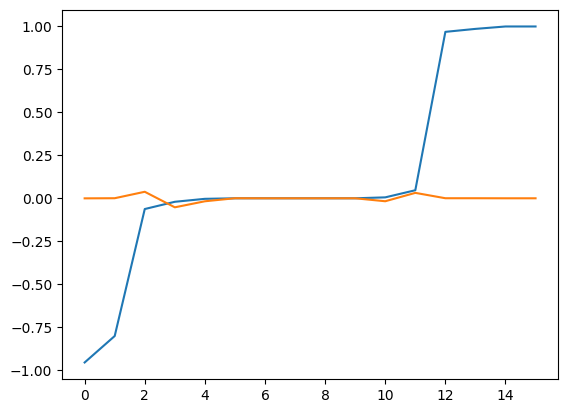

In [48]:
arr = numpy.array(sorted(numpy.linalg.eigvals(mat), key=lambda x: x.real))

pyplot.plot(arr.real)
pyplot.plot(arr.imag)
pyplot.show()

# Histograms

In [172]:
def make_fan(b, t=None, tfun=None, N=N):
    if t is None:
        for i in range(1, N):
            b.apply_gate([0, i], tfun())
    else:
        for i in range(1, N):
            b.apply_gate([0, i], t)
    
def make_cycle(b, t=None, tfun=None, N=N):
    if t is None:
        for i in range(0, N):
            b.apply_gate([i, (i+1)%N], tfun())
    else:
        for i in range(0, N):
            b.apply_gate([i, (i+1)%N], t)

In [188]:
def run_once_ortho_tensor_same(N=4):
    o = ortho_group.rvs(2)
    o = numpy.kron(o, o)
    return run_once(u=o, N=N)

def run_once_ortho_tensor(N=4):
    o1 = ortho_group.rvs(2)
    o2 = ortho_group.rvs(2)
    o = numpy.kron(o1, o2)
    return run_once(u=o, N=N)

def run_once_ortho(N=4):
    o = ortho_group.rvs(4)
    return run_once(u=o, N=N)

def run_once_unitary_tensor_same(N=4):
    u = unitary_group.rvs(2)
    u = numpy.kron(u, u)
    return run_once(u=u, N=N)

def run_once_unitary(N=4):
    u = unitary_group.rvs(4)
    return run_once(u=u, N=N)
    
def run_once_ident(N=4):
    u = numpy.eye(4)
    return run_once(u=u, N=N)
    
def run_once(u=None,N=4, make_circuit=None):
    t = numpy.array([
        [1.,0.,0.,0.],
        [0.,.5,.5,0.],
        [0.,.5,.5,0.],
        [0.,0.,0.,1.],
    ], dtype=numpy.complex128)
    t = numpy.conjugate(u.T) @ t @ u
    b = py_qip.Circuit(qubits=N)
    if make_circuit is None:
        make_circuit = make_fan
    make_circuit(b, t, N=N)
    mat = b.get_circuit()
    return numpy.linalg.eigvals(mat)

In [126]:
N = 5

In [127]:
run_once_ortho_tensor_same()

array([ 1.00000000e+00+0.00000000e+00j, -1.25000000e-01+4.34920088e-34j,
       -4.21535165e-01-5.39260384e-33j, -4.21535165e-01+3.22593266e-33j,
        2.96535165e-01+1.46513616e-33j, -4.21535165e-01+9.06066565e-34j,
        2.96535165e-01+6.16297582e-33j,  2.96535165e-01-1.34815096e-33j,
        4.73616911e-17+3.08148791e-32j,  1.93294085e-17+2.64032020e-17j,
        1.93294085e-17-2.64032020e-17j,  1.00000000e+00+0.00000000e+00j,
        1.00000000e+00+0.00000000e+00j,  1.00000000e+00+0.00000000e+00j,
        1.00000000e+00+0.00000000e+00j,  5.80331096e-17+0.00000000e+00j])

In [128]:
ortho_eigenvals = []
for i in range(1000):
    eigs = run_once_ortho(N=N)
    ortho_eigenvals.extend(eigs)
ortho_eigenvals = numpy.array(ortho_eigenvals)

In [129]:
unitary_eigenvals = []
for i in range(1000):
    eigs = run_once_unitary(N=N)
    unitary_eigenvals.extend(eigs)
unitary_eigenvals = numpy.array(unitary_eigenvals)

In [130]:
ortho_tensor_eigenvals = []
for i in range(1000):
    eigs = run_once_ortho_tensor(N=N)
    ortho_tensor_eigenvals.extend(eigs)
ortho_tensor_eigenvals = numpy.array(ortho_tensor_eigenvals)

In [132]:
ortho_tensor_same_eigenvals = []
for i in range(1000):
    eigs = run_once_ortho_tensor_same(N=N)
    ortho_tensor_same_eigenvals.extend(eigs)
ortho_tensor_same_eigenvals = numpy.array(ortho_tensor_same_eigenvals)

In [139]:
unitary_tensor_same_eigenvals = []
for i in range(1000):
    eigs = run_once_unitary_tensor_same(N=N)
    unitary_tensor_same_eigenvals.extend(eigs)
unitary_tensor_same_eigenvals = numpy.array(unitary_tensor_same_eigenvals)

In [133]:
angles = numpy.linspace(0,2*numpy.pi)
unit_circ_x = numpy.cos(angles)
unit_circ_y = numpy.sin(angles)

# $T = P$

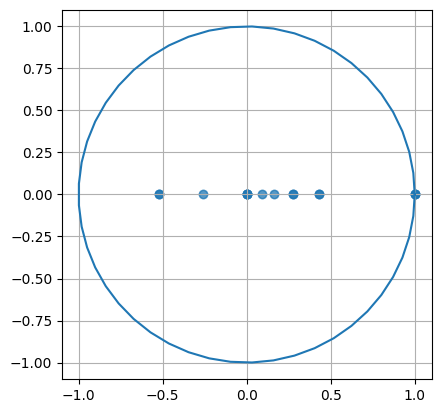

In [194]:
arr = run_once_ident(N=N)

pyplot.scatter(arr.real, arr.imag, alpha=0.5)
pyplot.gca().set_aspect('equal')
pyplot.plot(unit_circ_x, unit_circ_y)
pyplot.grid()
pyplot.show()

# $T = O^T P O$

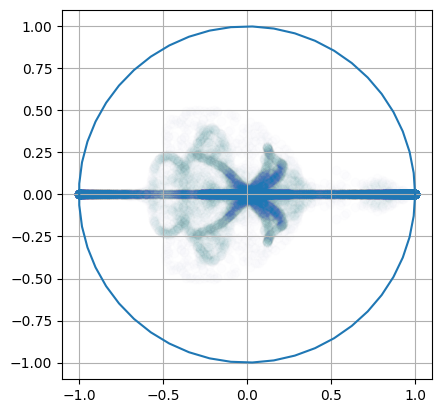

In [141]:
pyplot.scatter(ortho_eigenvals.real, ortho_eigenvals.imag, alpha=0.0075)
pyplot.gca().set_aspect('equal')
pyplot.plot(unit_circ_x, unit_circ_y)
pyplot.grid()
pyplot.show()

# $T = U^\dagger P U$

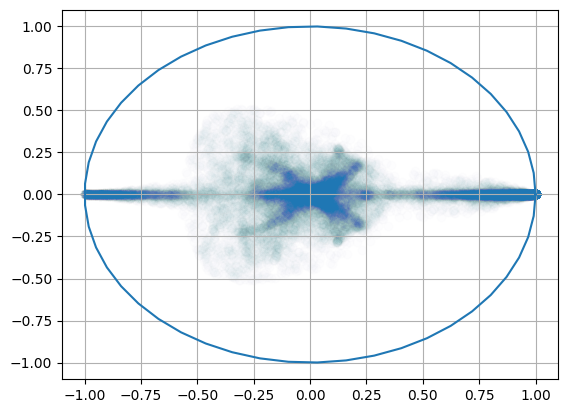

In [135]:
pyplot.scatter(unitary_eigenvals.real, unitary_eigenvals.imag, alpha=0.0075)
pyplot.gca().set_aspect('equal')
pyplot.plot(unit_circ_x, unit_circ_y)
pyplot.grid()

# $T = (O_1 \otimes O_2)^T P (O_1 \otimes O_2)$

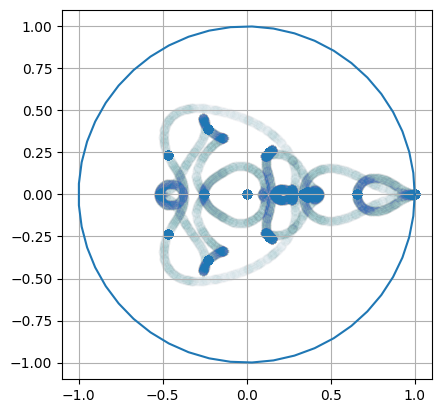

In [143]:
pyplot.scatter(ortho_tensor_eigenvals.real, ortho_tensor_eigenvals.imag, alpha=0.0075)
pyplot.gca().set_aspect('equal')
pyplot.plot(unit_circ_x, unit_circ_y)
pyplot.grid()

# $T = (O \otimes O)^T P (O \otimes O)$

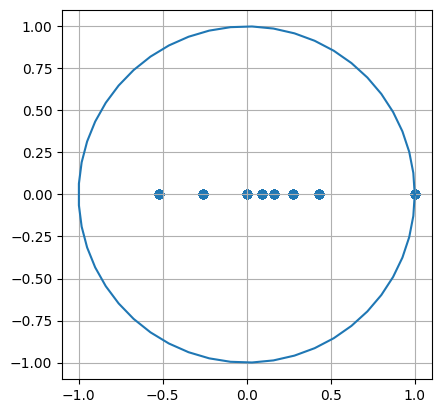

In [145]:
pyplot.scatter(ortho_tensor_same_eigenvals.real, ortho_tensor_same_eigenvals.imag, alpha=0.0075)
pyplot.gca().set_aspect('equal')
pyplot.plot(unit_circ_x, unit_circ_y)
pyplot.grid()

# $T = (U \otimes U)^T P (U \otimes U)$

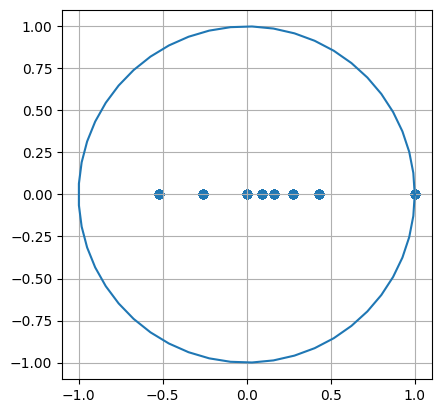

In [146]:
pyplot.scatter(unitary_tensor_same_eigenvals.real, unitary_tensor_same_eigenvals.imag, alpha=0.0075)
pyplot.gca().set_aspect('equal')
pyplot.plot(unit_circ_x, unit_circ_y)
pyplot.grid()

# Regen each time
Now each time we apply a T matrix, pick a new local basis

In [178]:
def run_once_resample_ortho_tensor_same(N=4):
    def make_o():
        o = ortho_group.rvs(2)
        o = numpy.kron(o, o)
        return o
    return run_once_resample(ufun=make_o, N=N)

def run_once_resample_ortho_tensor(N=4):
    def make_o():
        o1 = ortho_group.rvs(2)
        o2 = ortho_group.rvs(2)
        o = numpy.kron(o1, o2)
        return o
    return run_once_resample(ufun=make_o, N=N)

def run_once_resample_unitary_tensor_same(N=4):
    def make_u():
        u = unitary_group.rvs(2)
        u = numpy.kron(u, u)
        return u
    return run_once_resample(ufun=make_u, N=N)

def run_once_resample(ufun, N=4, make_circuit=None):
    toriginal = numpy.array([
        [1.,0.,0.,0.],
        [0.,.5,.5,0.],
        [0.,.5,.5,0.],
        [0.,0.,0.,1.],
    ], dtype=numpy.complex128)
    def make_t():
        u = ufun()
        t = numpy.conjugate(u.T) @ toriginal @ u
        return t
    b = py_qip.Circuit(qubits=N)
    if make_circuit is None:
        make_circuit = make_fan
    make_circuit(b, tfun=make_t, N=N)
    mat = b.get_circuit()
    return numpy.linalg.eigvals(mat)

In [182]:
orthogonal_tensor_resample_eigenvals = []
for i in range(1000):
    eigs = run_once_resample_ortho_tensor(N=N)
    orthogonal_tensor_resample_eigenvals.extend(eigs)
orthogonal_tensor_resample_eigenvals = numpy.array(orthogonal_tensor_resample_eigenvals)

In [183]:
orthogonal_tensor_resample_same_eigenvals = []
for i in range(1000):
    eigs = run_once_resample_ortho_tensor_same(N=N)
    orthogonal_tensor_resample_same_eigenvals.extend(eigs)
orthogonal_tensor_resample_same_eigenvals = numpy.array(orthogonal_tensor_resample_same_eigenvals)

In [184]:
unitary_tensor_resample_same_eigenvals = []
for i in range(1000):
    eigs = run_once_resample_unitary_tensor_same(N=N)
    unitary_tensor_resample_same_eigenvals.extend(eigs)
unitary_tensor_resample_same_eigenvals = numpy.array(unitary_tensor_resample_same_eigenvals)

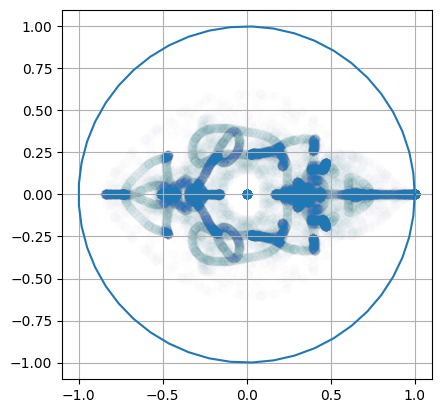

In [185]:
pyplot.scatter(orthogonal_tensor_resample_eigenvals.real, orthogonal_tensor_resample_eigenvals.imag, alpha=0.0075)
pyplot.gca().set_aspect('equal')
pyplot.plot(unit_circ_x, unit_circ_y)
pyplot.grid()

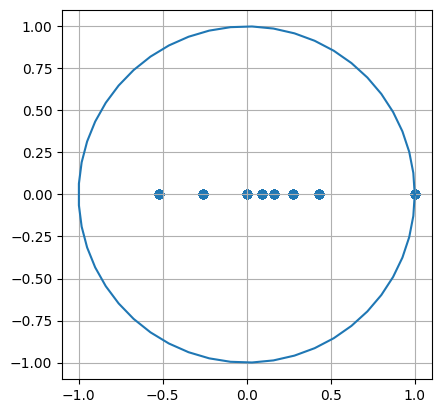

In [186]:
pyplot.scatter(orthogonal_tensor_resample_same_eigenvals.real, orthogonal_tensor_resample_same_eigenvals.imag, alpha=0.0075)
pyplot.gca().set_aspect('equal')
pyplot.plot(unit_circ_x, unit_circ_y)
pyplot.grid()

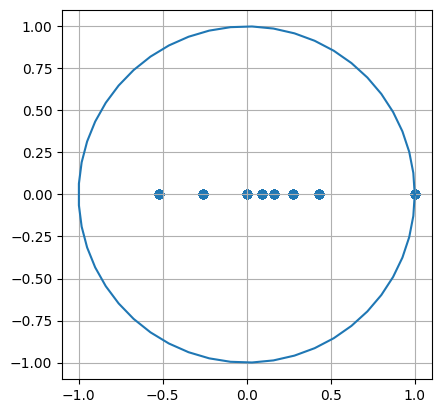

In [187]:
pyplot.scatter(unitary_tensor_resample_same_eigenvals.real, unitary_tensor_resample_same_eigenvals.imag, alpha=0.0075)
pyplot.gca().set_aspect('equal')
pyplot.plot(unit_circ_x, unit_circ_y)
pyplot.grid()